In [37]:
import plotly.offline as pyo
import plotly.graph_objs as go 
import plotly.figure_factory as ff
import pandas as pd
import sys 
import matplotlib.pyplot as plt

sys.path.append('../')  

import omdutils as omd 

pd.options.display.max_columns = 999

In [38]:
sql = 'SELECT * FROM cars'
db = '../SourceData/datasets.db'
df = omd.from_sqlite(sql, db)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


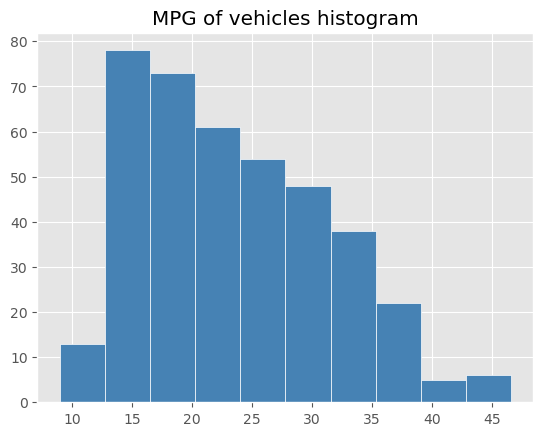

In [39]:
plt.style.use('ggplot')
plt.hist(df['mpg'], bins=10, color='steelblue', edgecolor='white')
plt.title('MPG of vehicles histogram');

In [40]:
data = [go.Histogram(x=df['mpg'], 
                     xbins=dict(start=0, end=50, size=5),
                     marker=dict(color='steelblue'))]
layout = go.Layout(title='MPG of vehicles histogram',
                   title_x=0.5,
                   xaxis=dict(title='MPG'),
                   yaxis=dict(title='Frequency'),
                   bargap=0.05)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [47]:
data = ff.create_distplot([df['mpg']], 
                          bin_size=5,
                          group_labels=['MPG'], 
                          colors=['steelblue'])
layout = go.Layout(title='MPG of vehicles histogram',
                   title_x=0.5,
                   xaxis=dict(title='MPG'),
                   yaxis=dict(title='Frequency'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [69]:
# Prepare data for the grouped distribution plot
grouped_data = [df[df['cylinders'] == cyl]['mpg'] for cyl in df['cylinders'].unique()]
group_labels = [f'{int(cyl)} cylinders' for cyl in df['cylinders'].unique()]

# Create the distribution plot
data = ff.create_distplot(grouped_data, 
                          group_labels=group_labels, 
                          bin_size=5,
                          colors=['steelblue', 'orange', 'green', 'red', 'purple', 'brown'])

# Define the layout with adjusted height
layout = go.Layout(title='MPG of vehicles histogram',
                   title_x=0.5,
                   xaxis=dict(title='MPG'),
                   yaxis=dict(title='Frequency'),
                   xaxis_title_text='MPG',
                   yaxis_title_text='Frequency',
                   height=800)  # Adjust the height here (in pixels)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Update layout properties
fig.update_layout(height=800)

# Show the plot
fig.show()

In [70]:
sql = 'SELECT * FROM abalone'
db = '../SourceData/datasets.db'
df = omd.from_sqlite(sql, db)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [72]:
data = [go.Histogram(x=df['length'],
                        xbins=dict(start=0, end=1, size=0.01),
                        marker=dict(color='steelblue'))]
layout = go.Layout(title='Length of abalones histogram', 
                   title_x=0.5,
                   xaxis=dict(title='Length'),
                   yaxis=dict(title='Frequency'),
                   bargap=0.05)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)
fig.show()   

In [83]:
# Prepare data for the grouped distribution plot
grouped_data = [df[df['sex'] == sex]['length'] for sex in df['sex'].unique()]
group_labels = [sex for sex in df['sex'].unique()]

# Create the distribution plot
data = ff.create_distplot(grouped_data, 
                          group_labels=group_labels, 
                          bin_size=0.01,
                          colors=['steelblue', 'red', 'green'])

layout = go.Layout(title='Length of abalones histogram', 
                   title_x=0.5,
                   xaxis=dict(title='Length'),
                   yaxis=dict(title='Frequency'),
                   bargap=0.05,
                   height=800)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(height=800)
# pyo.plot(fig)
fig.show()  

## Iris dataset

In [101]:
# df = pd.read_csv('../Data/iris.csv')
# omd.to_sqlite(df, 'iris', '../SourceData/datasets.db')
sql = 'SELECT * FROM iris'
db = '../SourceData/datasets.db'
df = omd.from_sqlite(sql, db)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
grouped_data = [df[df['class'] == cl]['petal_length'] for cl in df['class'].unique()]
group_labels = [cl for cl in df['class'].unique()]

data = ff.create_distplot(grouped_data,
                          group_labels=group_labels,
                          bin_size=0.1,
                          colors=['steelblue', 'red', 'green'])

layout = go.Layout(title='Sepal length of iris flowers histogram',
                     title_x=0.5,
                     xaxis=dict(title='Petal length'),
                     yaxis=dict(title='Frequency'),
                     bargap=0.05,
                     height=600)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(height=600)
fig.show()